# LOTTERY DRAFT SIMULATOR

In [1]:
tickets = {'12th': 25, '11th': 19, '10th': 14,
           '9th': 10, '8th': 7, '7th': 5}

protections = {3: '12th', 4 : '11th', 5 : '10th'}

In [63]:
import copy
import random
import pandas as pd
import time

def draft_sim(tickets, protections):
    
    temp_tickets = copy.deepcopy(tickets)
    winners = []

    for pick_no in range(1,len(temp_tickets)+1):
        
        if pick_no in protections:
            if protections[pick_no] not in winners:
                winner = protections[pick_no]
                winners.append(winner)
                temp_tickets.pop(winner)
                continue
        
        draft_outcomes = []
        for ticket in temp_tickets:
            no_tickets = temp_tickets[ticket]
            draft_outcomes.extend([ticket]*no_tickets)

        selection = random.randint(0,len(draft_outcomes)-1)
        winner = draft_outcomes[selection]
        winners.append(winner)
        temp_tickets.pop(winner)
    
    return winners

def get_summary_total(sim_results, tickets, isProb = True):
    teams = copy.deepcopy(tickets)
    no_simulations = len(sim_results)
    summary = {}
    
    for team in teams:
        team_dict = dict(zip(list(range(1,len(teams)+1)),[0]*len(teams)))
        for i in range(no_simulations):
            team_dict[sim_results[i].index(team)+1] += 1
        if isProb:
            team_dict = {f'Pick #{key}' : team_dict[key]/no_simulations for key in team_dict}
        summary[team] = team_dict
    summary = pd.DataFrame.from_dict(summary)
    
    return summary

def print_draft(tickets,protections,year,pick_declaration_pause,next_pick_pause):
    simulation_results = draft_sim(tickets,protections)
    
    print(f'THE 6th PICK IN THE {year} DYNOSHARKS DRAFT GOES TO ....')
    time.sleep(pick_declaration_pause)
    print(f'THE {simulation_results[-1]} SEED')
    time.sleep(next_pick_pause)
    print('\n')
    print(f'AND THE 5th PICK IN THE {year} DYNOSHARKS DRAFT GOES TO ....')
    time.sleep(pick_declaration_pause)
    print(f'THE {simulation_results[-2]} SEED')
    time.sleep(next_pick_pause)
    print('\n')
    print(f'AND THE 4th PICK IN THE {year} DYNOSHARKS DRAFT GOES TO ....')
    time.sleep(pick_declaration_pause)
    print(f'THE {simulation_results[-3]} SEED')
    time.sleep(next_pick_pause)
    print('\n')
    print(f'AND THE 3rd PICK IN THE {year} DYNOSHARKS DRAFT GOES TO ....')
    time.sleep(pick_declaration_pause)
    print(f'THE {simulation_results[-4]} SEED')
    time.sleep(next_pick_pause)
    print('\n')
    print(f'AND THE 2nd PICK IN THE {year} DYNOSHARKS DRAFT GOES TO ....')
    time.sleep(pick_declaration_pause)
    print(f'THE {simulation_results[-5]} SEED')
    time.sleep(next_pick_pause)
    print('\n')
    print(f'LAST BUT NOT LEAST, THE 1st PICK IN THE {year} DYNOSHARKS DRAFT GOES TO ....')
    time.sleep(next_pick_pause)
    print(f'THE {simulation_results[-6]} SEED')

In [22]:
no_simulations = 100000
results_with_protection = []
results_without_protection = []

#############WITH PROTECTIONS###############
for i in range(no_simulations):
    results_with_protection.append(draft_sim(tickets,protections))

#############WITHOUT PROTECTIONS###############
for i in range(no_simulations):
    results_without_protection.append(draft_sim(tickets,{}))

In [40]:
with_protection = get_summary_total(results_with_protection, tickets)
without_protection = get_summary_total(results_without_protection, tickets)

print('DRAFT POSITION PROBABILITY WITH PROTECTION')
print(round(with_protection.T,2))
print('\n')
print('DRAFT POSITION PROBABILITY WITHOUT PROTECTION')
print(round(without_protection.T,2))

DRAFT POSITION PROBABILITY WITH PROTECTION
      Pick #1  Pick #2  Pick #3  Pick #4  Pick #5  Pick #6
12th     0.31     0.26     0.43     0.00     0.00     0.00
11th     0.24     0.23     0.15     0.38     0.00     0.00
10th     0.18     0.19     0.15     0.19     0.30     0.00
9th      0.13     0.14     0.12     0.18     0.24     0.20
8th      0.09     0.11     0.09     0.15     0.25     0.32
7th      0.06     0.08     0.06     0.11     0.21     0.48


DRAFT POSITION PROBABILITY WITHOUT PROTECTION
      Pick #1  Pick #2  Pick #3  Pick #4  Pick #5  Pick #6
12th     0.31     0.26     0.20     0.13     0.07     0.02
11th     0.24     0.23     0.21     0.17     0.11     0.04
10th     0.17     0.19     0.20     0.20     0.16     0.08
9th      0.12     0.14     0.17     0.20     0.21     0.16
8th      0.09     0.10     0.13     0.17     0.24     0.28
7th      0.06     0.08     0.10     0.14     0.21     0.42


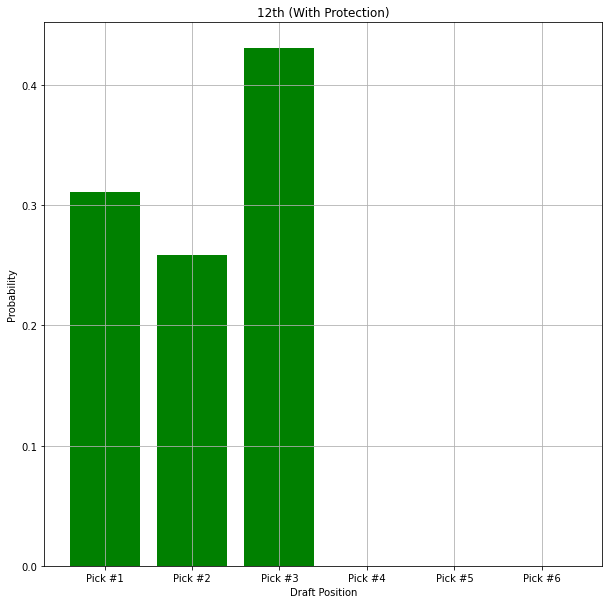

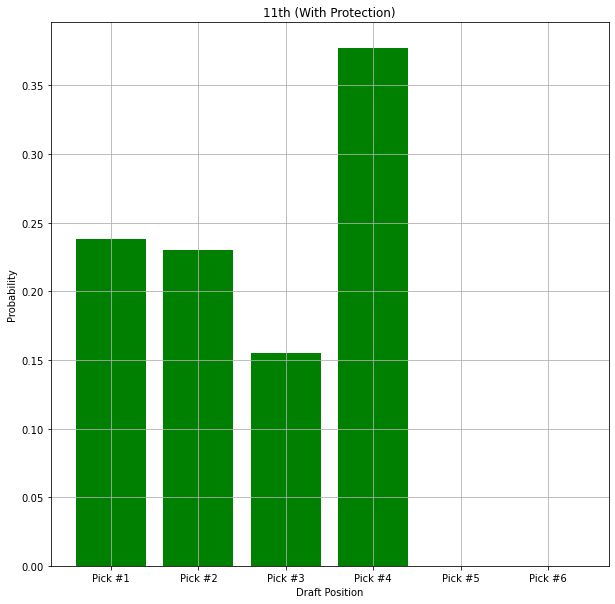

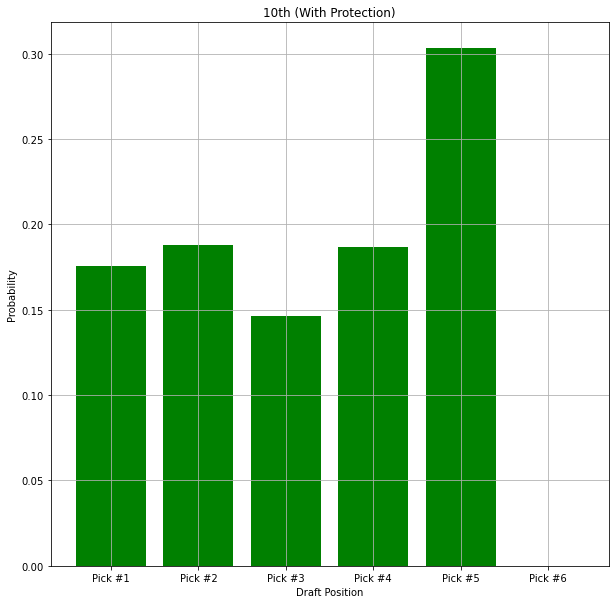

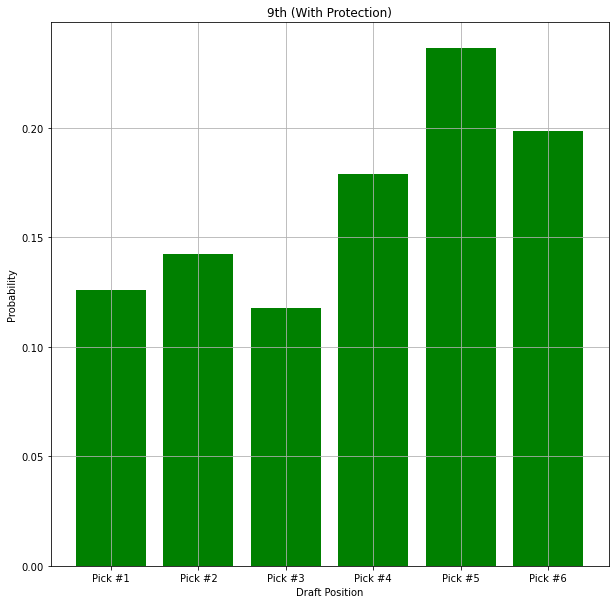

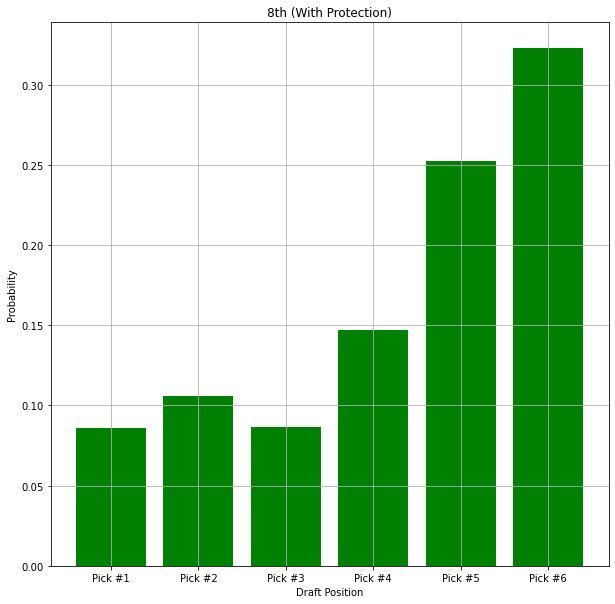

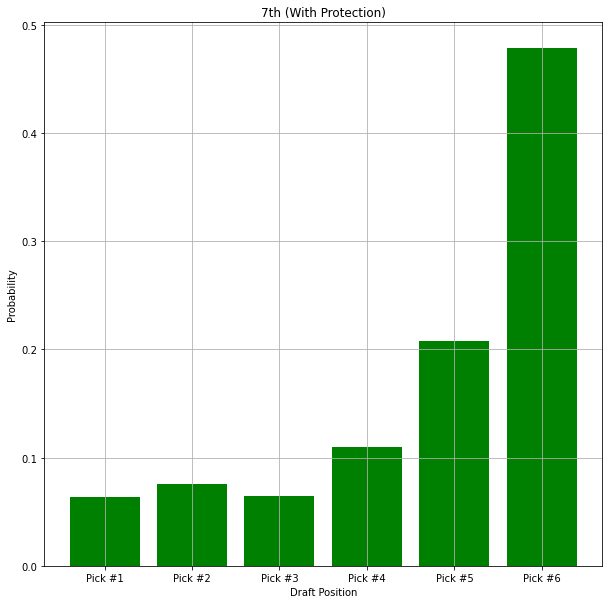

In [38]:
import matplotlib.pyplot as plt

for team in with_protection:
    plt.figure(figsize = (10,10))
    plt.title(team + ' (With Protection)')
    plt.ylabel('Probability')
    plt.xlabel('Draft Position')
    plt.grid()
    plt.bar(with_protection[team].index, with_protection[team], color = 'g')
    plt.show()
    
#     plt.figure(figsize = (10,10))
#     plt.title(team + ' (Without Protection)')
#     plt.ylabel('Probability')
#     plt.xlabel('Draft Position')
#     plt.grid()
#     plt.bar(without_protection[team].index, without_protection[team], color = 'b')
#     plt.show()

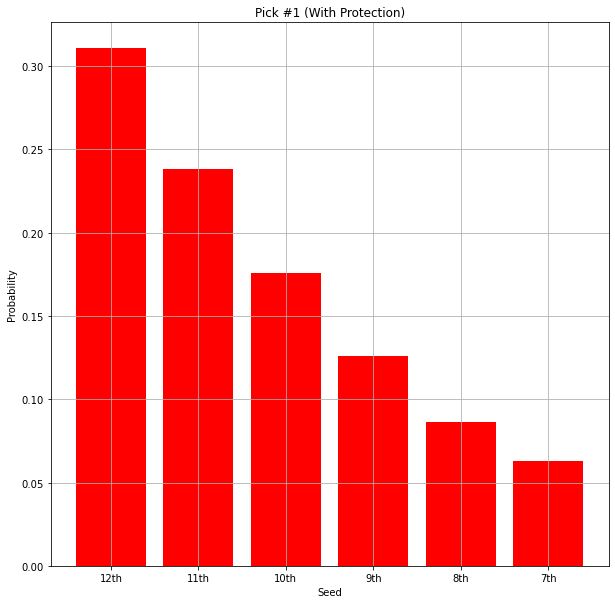

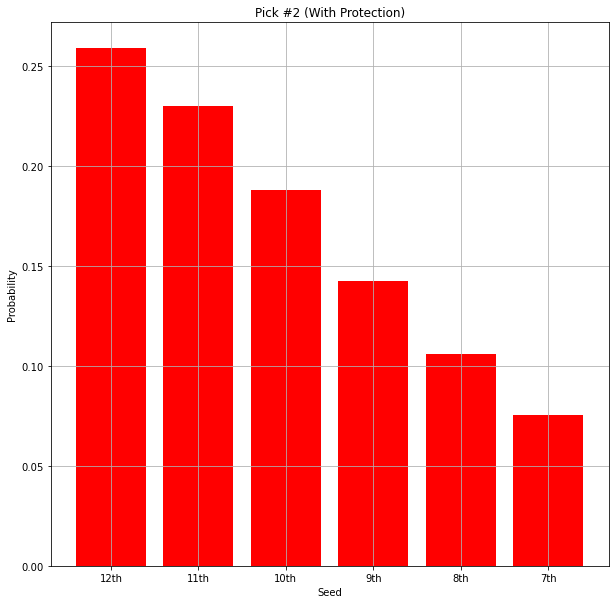

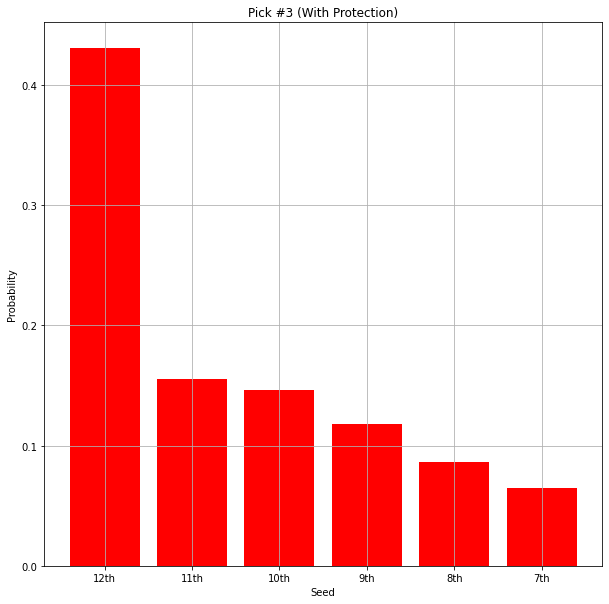

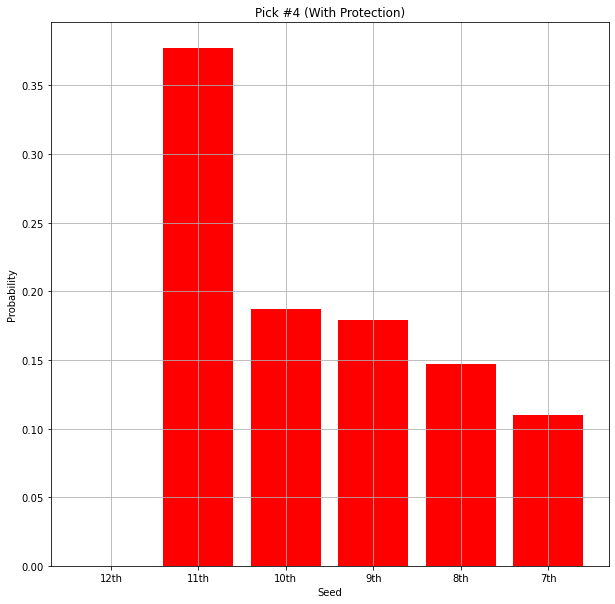

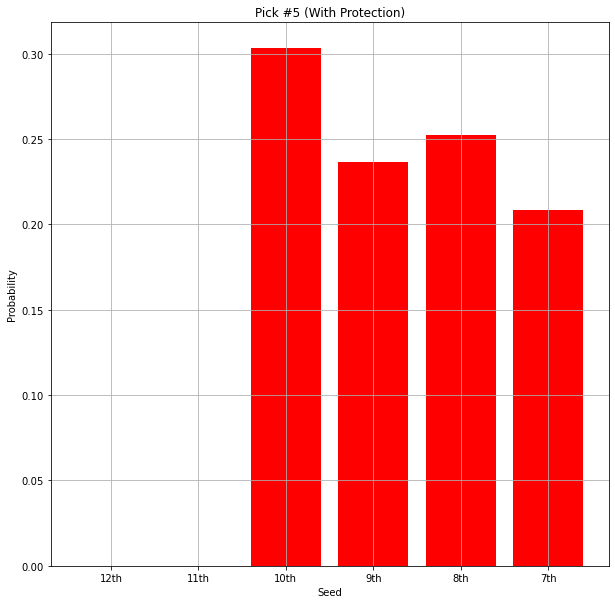

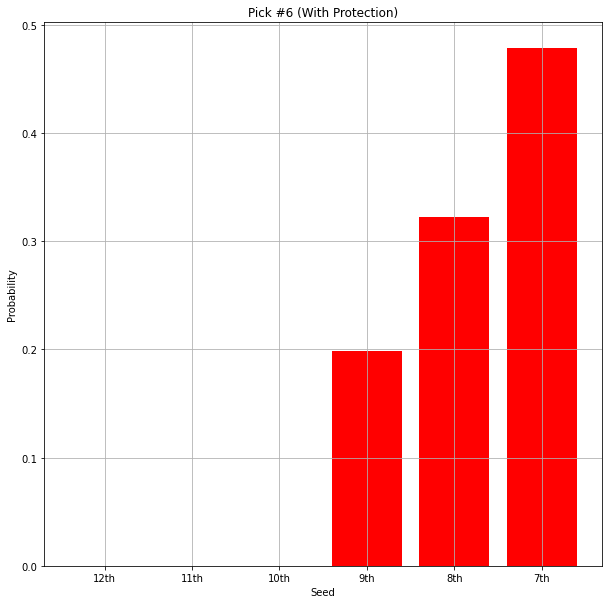

In [68]:
import matplotlib.pyplot as plt

for team in with_protection.T:
    plt.figure(figsize = (10,10))
    plt.title(team + ' (With Protection)')
    plt.ylabel('Probability')
    plt.xlabel('Seed')
    plt.grid()
    plt.bar(with_protection.T[team].index, with_protection.T[team], color = 'r')
    plt.show()

#     plt.figure(figsize = (10,10))
#     plt.title(team + ' (Without Protection)')
#     plt.ylabel('Probability')
#     plt.xlabel('Draft Position')
#     plt.grid()
#     plt.bar(without_protection.T[team].index, without_protection.T[team], color = 'y')
#     plt.show()

In [70]:
print('COMMENCING MOCK DRAFT')
print('\n')

year = '2024'
pick_declaration_pause = 10
next_pick_pause = 5

print_draft(tickets,protections,year,pick_declaration_pause,next_pick_pause)

COMMENCING MOCK DRAFT


THE 6th PICK IN THE 2024 DYNOSHARKS DRAFT GOES TO ....
THE 7th SEED


AND THE 5th PICK IN THE 2024 DYNOSHARKS DRAFT GOES TO ....
THE 8th SEED


AND THE 4th PICK IN THE 2024 DYNOSHARKS DRAFT GOES TO ....
THE 9th SEED


AND THE 3rd PICK IN THE 2024 DYNOSHARKS DRAFT GOES TO ....
THE 12th SEED


AND THE 2nd PICK IN THE 2024 DYNOSHARKS DRAFT GOES TO ....
THE 10th SEED


LAST BUT NOT LEAST, THE 1st PICK IN THE 2024 DYNOSHARKS DRAFT GOES TO ....
THE 11th SEED
